# Predicting Policy Renewals



Problem Statemnet: Our client's business model is centered on policy subscriptions and as a result, renewals are critical to the company’s success. In this assignment you will predict policy renewal. The dataset provided contains dummy renewal information for 690 renewals.


In [59]:
# Importing necessary package for creating model
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [60]:
df=pd.read_csv('data.csv')

In [61]:
df.isnull().sum()

C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
C11        0
C12        0
C13        0
C14        0
C15        0
Renewal    0
dtype: int64

In [62]:
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [63]:
df.shape

(690, 16)

In [64]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'Renewal'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       690 non-null    object 
 1   C2       690 non-null    object 
 2   C3       690 non-null    float64
 3   C4       690 non-null    object 
 4   C5       690 non-null    object 
 5   C6       690 non-null    object 
 6   C7       690 non-null    object 
 7   C8       690 non-null    float64
 8   C9       690 non-null    object 
 9   C10      690 non-null    object 
 10  C11      690 non-null    int64  
 11  C12      690 non-null    object 
 12  C13      690 non-null    object 
 13  C14      690 non-null    object 
 14  C15      690 non-null    int64  
 15  Renewal  690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


In [66]:
df.isna().sum()

C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
C11        0
C12        0
C13        0
C14        0
C15        0
Renewal    0
dtype: int64

In [67]:
df.dtypes

C1          object
C2          object
C3         float64
C4          object
C5          object
C6          object
C7          object
C8         float64
C9          object
C10         object
C11          int64
C12         object
C13         object
C14         object
C15          int64
Renewal      int64
dtype: object

Find out the categorical and Numerical coulmns in the dataset:

In [68]:
all_columns         = list(df)
numeric_columns     = ['C2', 'C3', 'C8','C14','C15','Renewal']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['C2', 'C3', 'C8', 'C14', 'C15', 'Renewal']

Categorical columns
['C1', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10', 'C11', 'C12', 'C13']


Handling the special character in the dataset . we are taking the Assumption , special character in the Categorical variable is handle with XYZ value , Numerical Variable is handle with 0.

In [69]:
def remove_special_character(val):
    if val[0] in categorical_columns:
        for i in df[val]:
            #print(i)
            df[i].mask(df[i] == '?','xyz', inplace=True)
    else:
        for i in df[val]:
            #print(i)
            df[i].mask(df[i] == '?',0, inplace=True)

In [70]:
remove_special_character(categorical_columns)
remove_special_character(numeric_columns)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [71]:
df['C2'].astype('float64')
df['C14'].astype('int64')

0      202
1       43
2      280
3      100
4      120
      ... 
685    260
686    200
687    200
688    280
689      0
Name: C14, Length: 690, dtype: int64

# Analysis

Analysis play's the vital role to understand the dataset . In the below function we are trying to understand the Independent variable to know what are the ratio 1's and 0's in the dataset . We have used the various analysis such as pie chart , count plot etc. 

In [72]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)#the amount of height reserved for space between subplots,
    sns.set_palette('red')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

Text(0, 0.5, 'count')

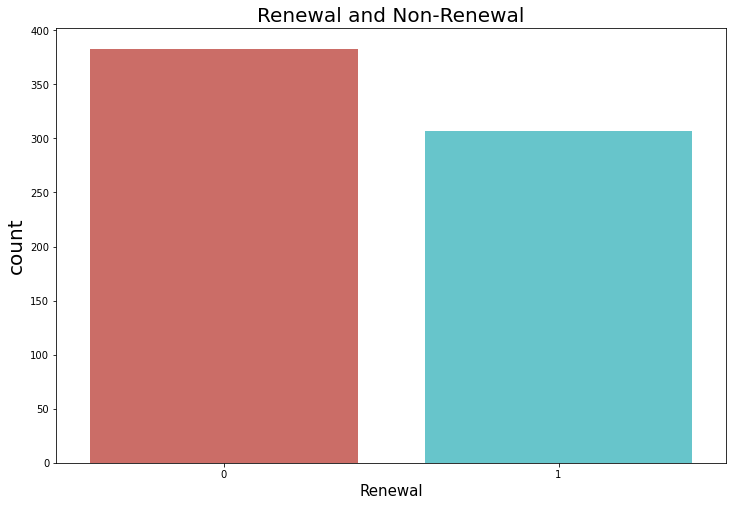

In [73]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,8))
g = sns.countplot(x="Renewal",data=df,palette='hls')
g.set_title("Renewal and Non-Renewal", fontsize=20)
g.set_xlabel("Renewal", fontsize=15)
g.set_ylabel("count", fontsize=20)


Count Plot gives the insights that target variable in the dataset is inbalanced 

In [74]:
summary('Renewal')

5 Point Summary of Renewal Attribute:
Renewal(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 1.0
Renewal(max) : 1


ValueError: red is not a valid palette name

<Figure size 1152x720 with 0 Axes>

In [75]:
# Create a function that returns a Pie chart for categorical variable:
def pie_chart(x = 'Renewal'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = df.groupby(x).size()
    


    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    ##need to check
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()

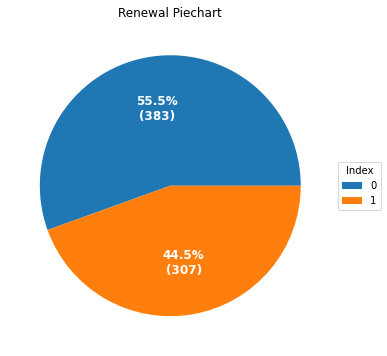

In [76]:
pie_chart('Renewal')

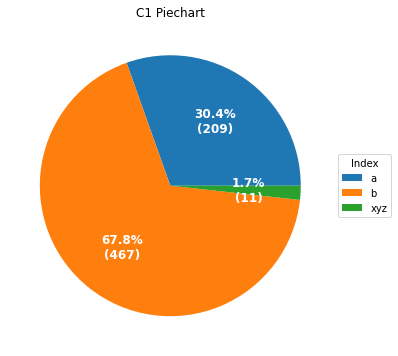

In [77]:
pie_chart('C1')

In [78]:
df['C11'].max()

67

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


    C11   Renewal
0     0  0.248101
1     1  0.492958
2     2  0.422222
3     3  0.714286
4     4  0.800000
5     5  0.888889
6     6  0.869565
7     7  0.937500
8     8  1.000000
9     9  1.000000
10   10  0.500000
11   11  0.947368
12   12  0.875000
13   13  1.000000
14   14  1.000000
15   15  1.000000
16   16  1.000000
17   17  1.000000
18   19  1.000000
19   20  0.500000
20   23  1.000000
21   40  1.000000
22   67  1.000000


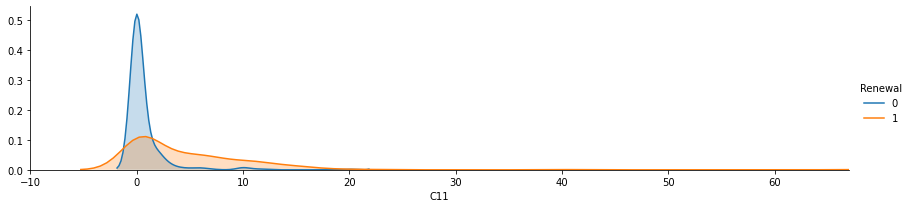

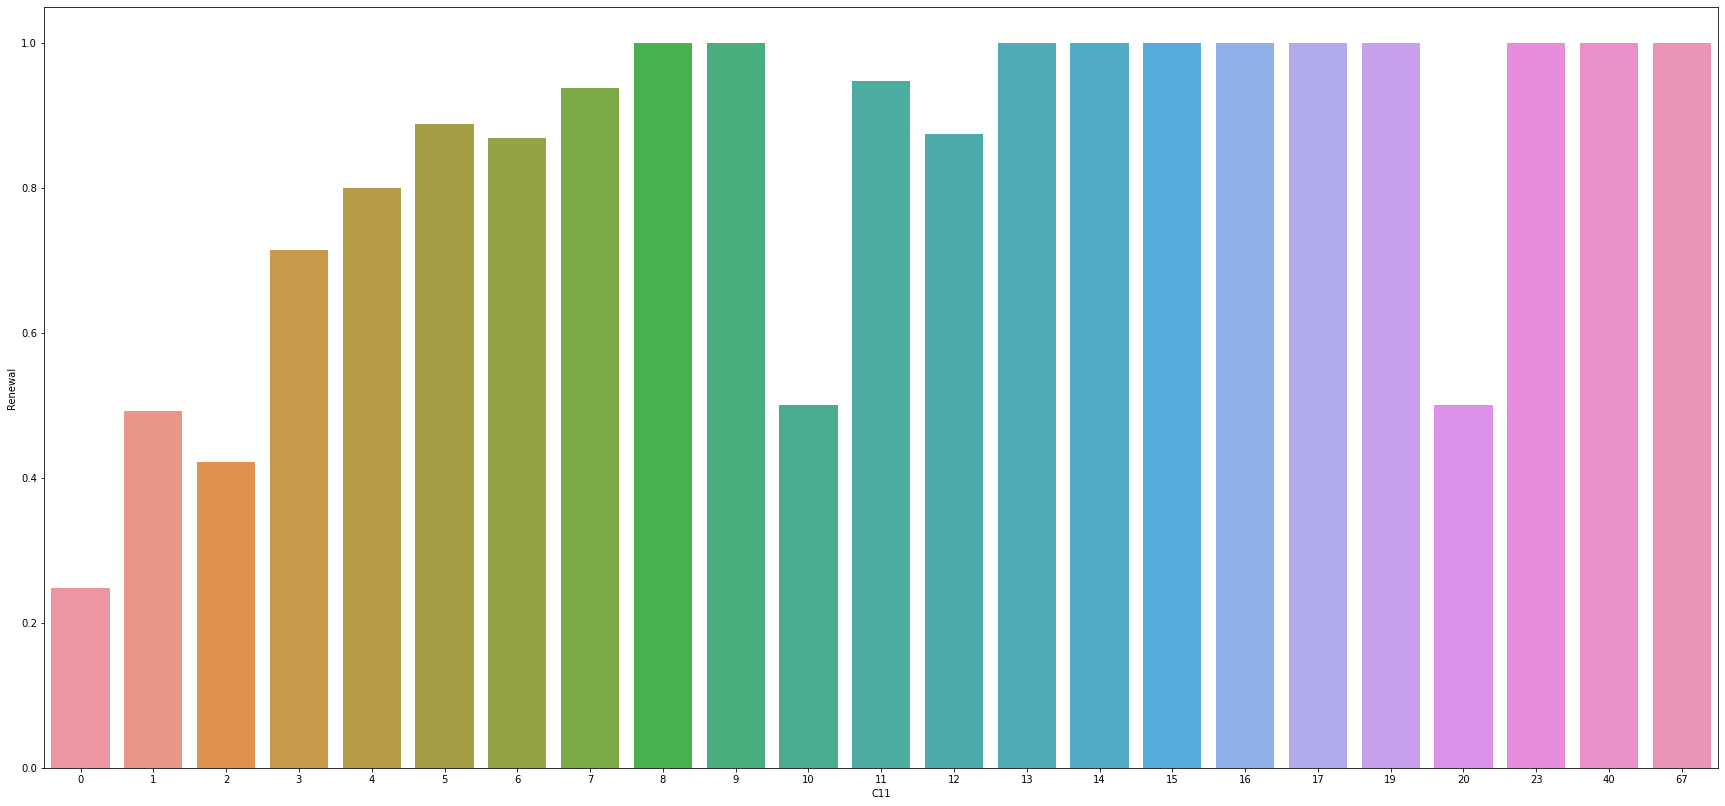

In [79]:
facet = sns.FacetGrid(df, hue="Renewal",aspect=4)
facet.map(sns.kdeplot,'C11',shade= True)
facet.set(xlim=(-10, df['C11'].max()))   #age factor explain 
facet.add_legend()

# average exited customers by age
fig, axis1 = plt.subplots(1,1,figsize=(30,14))
average_age = df[["C11", "Renewal"]].groupby(['C11'],as_index=False).mean()
print(average_age)
average_age.columns = ['C11','Renewal']
sns.barplot(x='C11', y='Renewal', data=average_age)
del average_age


This plot gives the insights that continous variable with specific range of values has the policy renewal .

# Outlier detection

An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.
After looking the boxplot we can say C15 variable contain large amount of outlier . 

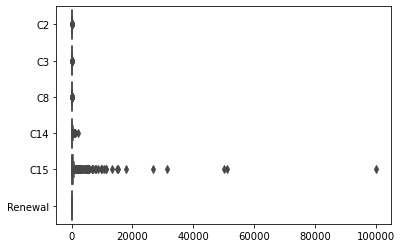

In [80]:
ax = sns.boxplot(data = df[numeric_columns], orient = "h", color = "violet", palette = "Set1")
plt.show()

# How to detect outliers?

👉  Use Inter-Quartile Range (IQR) proximity rule.

– The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.


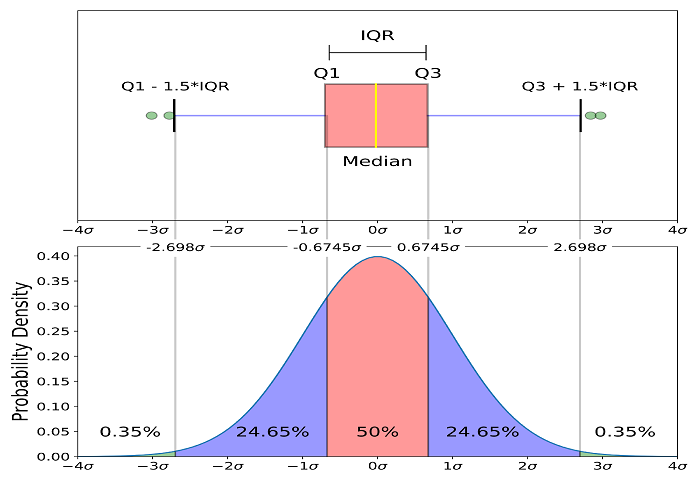

Interquartile Range (IQR) to Detect Outliers 




In [81]:
def outlier_detect(df):
    outlier_columns_handle=[]
    for i in df.describe().columns:
        print(i)
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print('Lower Limit= %f , Upper Limit= %f ,IQR= %f'%(LTV,UTV,IQR))
        print(p)
        

Function outlier detection return the number of the outlier values present in the coloumn .

In [82]:
x=df[numeric_columns]
outlier_detect(x)

C3

 Outliers for Column :  C3  Outliers count  17
Lower Limit= -8.311250 , Upper Limit= 16.518750 ,IQR= 6.207500
[18.5, 28.0, 25.125, 19.0, 19.5, 21.0, 25.085, 21.5, 26.335, 22.0, 18.125, 19.0, 19.5, 25.21, 22.29, 17.75, 20.0]
C8

 Outliers for Column :  C8  Outliers count  63
Lower Limit= -3.525000 , Upper Limit= 6.315000 ,IQR= 2.460000
[6.5, 7.875, 15.0, 7.0, 7.96, 7.585, 14.415, 8.625, 28.5, 7.415, 12.5, 13.5, 10.75, 8.5, 9.46, 10.0, 11.5, 14.0, 7.375, 8.5, 7.5, 13.0, 6.5, 8.0, 11.0, 9.0, 15.0, 8.0, 8.5, 15.0, 12.5, 8.5, 15.5, 14.0, 6.5, 10.0, 18.0, 7.0, 8.665, 20.0, 13.875, 10.0, 11.0, 14.0, 20.0, 6.5, 10.0, 13.875, 7.0, 7.0, 10.0, 6.5, 7.0, 6.5, 6.75, 7.5, 16.0, 12.75, 7.5, 12.75, 17.5, 8.5, 8.29]
C15

 Outliers for Column :  C15  Outliers count  113
Lower Limit= -593.250000 , Upper Limit= 988.750000 ,IQR= 395.500000
[31285, 1349, 1442, 2690, 1208, 1260, 10000, 5000, 4000, 2283, 1236, 5800, 50000, 15108, 2954, 11202, 1332, 1000, 2510, 51100, 1000, 1000, 5000, 2072, 2300, 3065, 22

# Handling the outlier 


For this dataset we are using the IRQ based Technique .

In [83]:
def cap_outliers(series, iqr_threshold=1.5, verbose=False):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)
    #print(series.loc[~outliers].max())
    series = series.copy()
    #print(series)
    t=series.loc[series > ubound]
    print('*****',t)
    series.loc[series < lbound] = series.loc[~outliers].min()
    r=series.loc[series < lbound] = series.loc[~outliers].min()
    print('&&&&&&&',r)
    series.loc[series > ubound] = series.loc[~outliers].max()
    o=series.loc[series > ubound] = series.loc[~outliers].max()
    print('******',o)

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

handle_columns=['C8','C3','C15']
for i in handle_columns:
    r=cap_outliers(df[i], verbose=True)
    df[i]=r

***** 6       6.500
22      7.875
27     15.000
28      7.000
31      7.960
        ...  
556     7.500
564    12.750
586    17.500
587     8.500
689     8.290
Name: C8, Length: 63, dtype: float64
&&&&&&& 0.0
****** 6.29
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -3.525
   Upper bound: 6.3149999999999995

***** 27     18.500
44     28.000
69     25.125
80     19.000
183    19.500
234    21.000
241    25.085
250    21.500
305    26.335
317    22.000
455    18.125
485    19.000
505    19.500
529    25.210
550    22.290
585    17.750
586    20.000
Name: C3, dtype: float64
&&&&&&& 0.0
****** 16.5
Capping outliers by the IQR method:
   IQR threshold: 1.5
   Lower bound: -8.31125
   Upper bound: 16.518749999999997

***** 6      31285
7       1349
9       1442
13      2690
20      1208
       ...  
589     5124
590     1200
596     4159
599     3000
627     1000
Name: C15, Length: 113, dtype: int64
&&&&&&& 0
****** 960
Capping outliers by the IQR method:
   IQR 

In [25]:
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


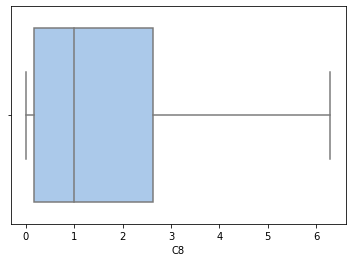

In [26]:
sns.boxplot(df['C8'])

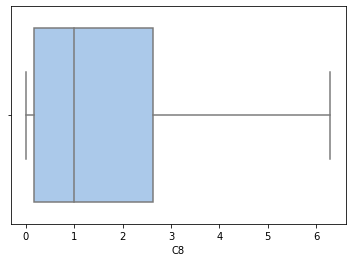

In [27]:
sns.boxplot(df['C8'])

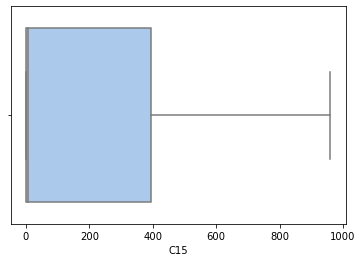

In [28]:
sns.boxplot(df['C15'])

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Frequency Distribuition')

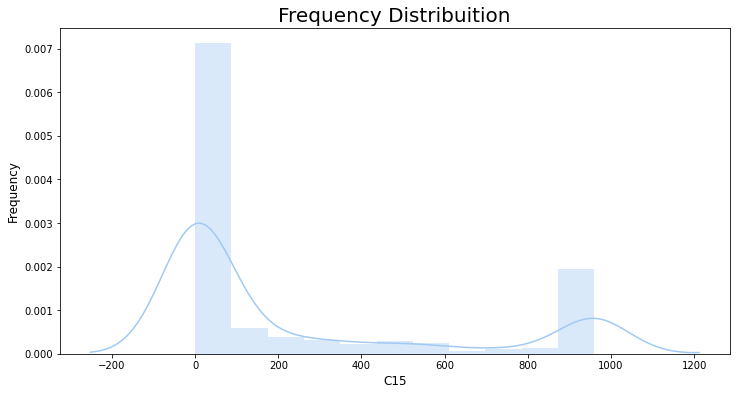

In [29]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["C15"])
g.set_xlabel("C15", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

In [30]:
df["C1"].unique()

array(['b', 'a', 'xyz'], dtype=object)

In [31]:
df.Renewal.value_counts()

0    383
1    307
Name: Renewal, dtype: int64

In [32]:
df.duplicated().sum()

0

# Encoding Categorical Variable

In [35]:
one_hot=pd.get_dummies(df[categorical_columns]) # It converts categorical data into dummy or indicator variables.
insur_procsd_df=pd.concat([df[numeric_columns],one_hot],axis=1)
insur_procsd_df.head(10)

,C2,C3,C8,C14,C15,Renewal,C11,C1_a,C1_b,C1_xyz,...,C7_z,C9_f,C9_t,C10_f,C10_t,C12_f,C12_t,C13_g,C13_p,C13_s
0,30.83,0.000,1.250,202,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.040,43,560,1,6,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.5,0.500,1.500,280,824,1,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.750,100,3,1,5,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.710,120,0,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
5,32.08,4.000,2.500,360,0,1,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0
6,33.17,1.040,6.290,164,960,1,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0
7,22.92,11.585,0.040,80,960,1,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
8,54.42,0.500,3.960,180,314,1,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
9,42.5,4.915,3.165,52,960,1,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0


In [36]:
insr_procsd_df_label=df
label_encoder = LabelEncoder()
for i in categorical_columns:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,43,560,1
2,0,24.5,0.500,1,0,10,3,1.500,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,120,0,1
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,360,0,1
6,1,33.17,1.040,1,0,11,3,6.290,1,0,0,1,0,164,960,1
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,80,960,1
8,1,54.42,0.500,3,2,8,3,3.960,1,0,0,0,0,180,314,1
9,1,42.5,4.915,3,2,12,7,3.165,1,0,0,1,0,52,960,1


# Feature Selection

In [37]:
y=insr_procsd_df_label["Renewal"]
x=insr_procsd_df_label.drop('Renewal',axis=1)

In [38]:
x.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560
2,0,24.5,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0


In [39]:
print(insr_procsd_df_label[insr_procsd_df_label['C2'] == '?']['C2'])

Series([], Name: C2, dtype: object)


In [40]:
y.unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Renewal, Length: 690, dtype: int64>

In [41]:
print(x.shape)
print(y.shape)

(690, 15)
(690,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

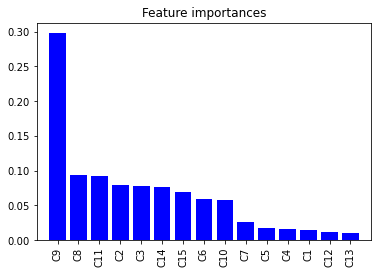

In [43]:
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(x, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
#print(indices)
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="blue", align="center")
plt.xticks(range(X_train.shape[1]), insr_procsd_df_label.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [44]:
x_features=['C9','C8','C11','C15','C3','C2','C14','C10','C6']

In [45]:
x_final=insr_procsd_df_label[x_features]

In [46]:
y_final=y

In [47]:
x_final.head()

,C9,C8,C11,C15,C3,C2,C14,C10,C6
0,1,1.25,1,0,0.000,30.83,202,1,12
1,1,3.04,6,560,4.460,58.67,43,1,10
2,1,1.50,0,824,0.500,24.5,280,0,10
3,1,3.75,5,3,1.540,27.83,100,1,12
4,1,1.71,0,0,5.625,20.17,120,0,12


 splitting data into training set and testing set

In [48]:
X_train,X_test,y_train,y_test = train_test_split(x_final,y_final,test_size = 0.20,random_state = 0)

In [49]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (552, 9)
X_test (138, 9)
y_train (552,)
y_test (138,)


# Model Building

Popular algorithms that can be used for binary classification include:

👉Logistic Regression

👉Random Forest Classifier

👉Decision Trees


 Applying k-Fold Cross Validation to evaluate the model

In [50]:
def k_fold(model,X_train,y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print('K-Fold cross validation mean:',accuracies.mean())
    print('K-Fold cross validation std:',accuracies.std()) 

# Logistic Classifier

In [51]:
# LogisticRegression classifier

model_1 = LogisticRegression(random_state=0)

# train model
start = time()
model_1.fit(X_train, y_train)
end = time()

# Training time
print('Training time:',end-start)

# Making predictions
y_pred = model_1.predict(X_test)

# get a sense of performance
accuracy_1 = classification_report(y_test,y_pred)
print('Accuracy:',accuracy_1)




Training time: 0.07429170608520508
Accuracy:               precision    recall  f1-score   support

           0       0.88      0.85      0.86        78
           1       0.81      0.85      0.83        60

    accuracy                           0.85       138
   macro avg       0.84      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Evaluation Of Model 


Confusion matrix: Train data


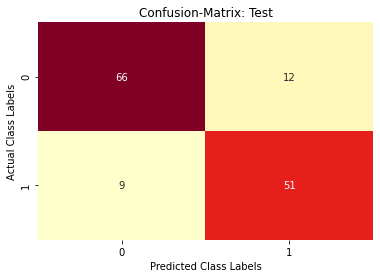

In [52]:
cm_te = confusion_matrix(y_test, y_pred)

print()
print("Confusion matrix: Train data")
ax= plt.subplot()
sns.heatmap(cm_te,annot=True,fmt='1g',cbar = False,cmap = 'YlOrRd')
ax.set_xlabel('Predicted Class Labels');
ax.set_ylabel('Actual Class Labels');
ax.set_title('Confusion-Matrix: Test');
plt.show()

# Random Forest Classifier

In [53]:
print('==================================')
print('Fitting RandomForest classifier')
print('==================================')


model_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# train model
start = time()
model_2.fit(X_train, y_train) 
end = time()

# Training time
print('Training time:',end-start)  
# Making prediction

y_pred_random = model_2.predict(X_test)

# get a  sense of performance
accuracy_2 = classification_report(y_test,y_pred)
print('Accuracy:',accuracy_2)

Fitting RandomForest classifier
Training time: 0.05056929588317871
Accuracy:               precision    recall  f1-score   support

           0       0.88      0.85      0.86        78
           1       0.81      0.85      0.83        60

    accuracy                           0.85       138
   macro avg       0.84      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



Evaluation Of Model 


Confusion matrix: Train data


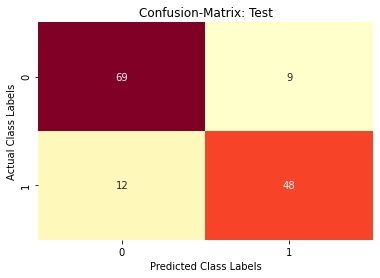

In [55]:
cm_te = confusion_matrix(y_test, y_pred_random)

print()
print("Confusion matrix: Train data")
ax= plt.subplot()
sns.heatmap(cm_te,annot=True,fmt='1g',cbar = False,cmap = 'YlOrRd')
ax.set_xlabel('Predicted Class Labels');
ax.set_ylabel('Actual Class Labels');
ax.set_title('Confusion-Matrix: Test');
plt.show()

# Decision Tree

In [56]:
print('==================================')
print('Decision classfier classifier')
print('==================================')

# instantiate model
model_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# train model
start = time()
model_3.fit(X_train, y_train) 
end = time()

# Training time
print('Training time:',end-start) 

# Making prediction
y_pred_tree = model_3.predict(X_test)

# get a sense of performance
accuracy_3 = classification_report(y_test,y_pred)
print('Decision tree accuracy:',accuracy_3)



Decision classfier classifier
Training time: 0.01056814193725586
Decision tree accuracy:               precision    recall  f1-score   support

           0       0.88      0.85      0.86        78
           1       0.81      0.85      0.83        60

    accuracy                           0.85       138
   macro avg       0.84      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



Evalution Of model


Confusion matrix: Train data


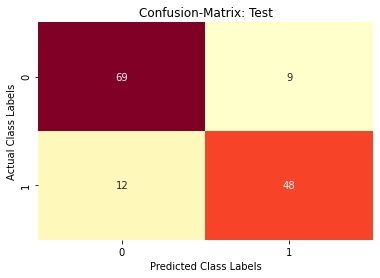

In [57]:
cm_te = confusion_matrix(y_test, y_pred_random)

print()
print("Confusion matrix: Train data")
ax= plt.subplot()
sns.heatmap(cm_te,annot=True,fmt='1g',cbar = False,cmap = 'YlOrRd')
ax.set_xlabel('Predicted Class Labels');
ax.set_ylabel('Actual Class Labels');
ax.set_title('Confusion-Matrix: Test');
plt.show()

In [58]:
# seems we will be working with logistic regression
# Applying Grid Search to find the best model and the best parameters
parameters = [{'C': [0.1,1, 10, 100],'penalty': ['l1','l2']}]
grid_search = GridSearchCV(estimator = model_1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print('best accuracy',best_accuracy)
print('best parameters',best_parameters)

best accuracy 0.8514935064935063
best parameters {'C': 0.1, 'penalty': 'l2'}


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
